In [218]:
import pandas as pd
import numpy as np
import seaborn as sns


In [219]:
index_value = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

In [220]:
a = pd.Series(range(1,9),index=index_value)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [221]:
# MultiIndex from Tuple

index_value = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

multindex = pd.MultiIndex.from_tuples(index_value)
multindex.levels[1]

Int64Index([2019, 2020, 2021, 2022], dtype='int64')

In [222]:
b = pd.MultiIndex.from_product([['cse', 'ece'],[2019, 2020, 2021, 2022]])
b.levels[0]

Index(['cse', 'ece'], dtype='object')

In [223]:
# Creating a series with Multi Index
s  = pd.Series(range(1,9),index=multindex)
s = s.unstack()

In [224]:
s.stack()


cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [225]:
branch_df1 = pd.DataFrame([

    [1,2],
    [3,4],
    [5,6],
    [7,8],
    [9,10],
    [11,12],
    [13,14],
    [15,16],


],index=multindex,columns=['avg_package','students'])

In [226]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [227]:
branch_df1.loc['ece']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [228]:
branch_df2 = pd.DataFrame(
[   
    [1,2,0,0],
    [3,4,0,0],
    [5,6,0,0],
    [7,8,0,0],

],
index = [2019,2020,2021,2022],
columns= pd.MultiIndex.from_product([['Delhi','Mumbai'],['Avg_package','Student']]),

)

In [229]:
branch_df2.loc[2019]

Delhi   Avg_package    1
        Student        2
Mumbai  Avg_package    0
        Student        0
Name: 2019, dtype: int64

In [230]:
branch_df3 = pd.DataFrame(
[   
    [1,2,0,0],
    [3,4,0,0],
    [5,6,0,0],
    [7,8,0,0],
    [9,10,0,0],
    [11,12,0,0],
    [13,14,0,0],
    [15,16,0,0]

],
index = multindex,
columns= pd.MultiIndex.from_product([['Delhi','Mumbai'],['Avg_package','Student']]),

)

In [231]:
branch_df3

Delhi              Mumbai        
         Avg_package Student Avg_package Student
cse 2019           1       2           0       0
    2020           3       4           0       0
    2021           5       6           0       0
    2022           7       8           0       0
ece 2019           9      10           0       0
    2020          11      12           0       0
    2021          13      14           0       0
    2022          15      16           0       0

In [232]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [233]:
branch_df3.head(1)

Delhi              Mumbai        
         Avg_package Student Avg_package Student
cse 2019           1       2           0       0

In [234]:
# Extracting Single Row
branch_df3.loc[('cse',2022)]

Delhi   Avg_package    7
        Student        8
Mumbai  Avg_package    0
        Student        0
Name: (cse, 2022), dtype: int64

In [235]:
# Multiple Rows
branch_df3.loc[('cse',2019):('ece',2020):2]

Delhi              Mumbai        
         Avg_package Student Avg_package Student
cse 2019           1       2           0       0
    2021           5       6           0       0
ece 2019           9      10           0       0

In [236]:
# Multiple Rows
branch_df3.iloc[[0,2,4]]

Delhi              Mumbai        
         Avg_package Student Avg_package Student
cse 2019           1       2           0       0
    2021           5       6           0       0
ece 2019           9      10           0       0

In [237]:
# Multiple Rows
branch_df3.iloc[0:5:2]

Delhi              Mumbai        
         Avg_package Student Avg_package Student
cse 2019           1       2           0       0
    2021           5       6           0       0
ece 2019           9      10           0       0

In [238]:
branch_df3.iloc[:,1:3]

Delhi      Mumbai
         Student Avg_package
cse 2019       2           0
    2020       4           0
    2021       6           0
    2022       8           0
ece 2019      10           0
    2020      12           0
    2021      14           0
    2022      16           0

In [239]:
# Extractinhg Both
branch_df3.iloc[::4,1:3]

,,Delhi,Mumbai
,,Student,Avg_package
cse,2019,2,0
ece,2019,10,0


In [240]:
branch_df3.iloc[[0,4],[1,2]]

,,Delhi,Mumbai
,,Student,Avg_package
cse,2019,2,0
ece,2019,10,0


In [241]:
# Sorting
branch_df3.sort_index(ascending=True)
branch_df3.sort_index(ascending=[False,True])
branch_df3.sort_index(ascending=True,level=1)


Delhi              Mumbai        
         Avg_package Student Avg_package Student
cse 2019           1       2           0       0
ece 2019           9      10           0       0
cse 2020           3       4           0       0
ece 2020          11      12           0       0
cse 2021           5       6           0       0
ece 2021          13      14           0       0
cse 2022           7       8           0       0
ece 2022          15      16           0       0

In [242]:
#  Transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
Delhi  Avg_package    1    3    5    7    9   11   13   15
       Student        2    4    6    8   10   12   14   16
Mumbai Avg_package    0    0    0    0    0    0    0    0
       Student        0    0    0    0    0    0    0    0

In [243]:
# Swap level 
branch_df3.swaplevel()


Delhi              Mumbai        
         Avg_package Student Avg_package Student
2019 cse           1       2           0       0
2020 cse           3       4           0       0
2021 cse           5       6           0       0
2022 cse           7       8           0       0
2019 ece           9      10           0       0
2020 ece          11      12           0       0
2021 ece          13      14           0       0
2022 ece          15      16           0       0

In [244]:
branch_df3.swaplevel(axis=1)

Avg_package Student Avg_package Student
               Delhi   Delhi      Mumbai  Mumbai
cse 2019           1       2           0       0
    2020           3       4           0       0
    2021           5       6           0       0
    2022           7       8           0       0
ece 2019           9      10           0       0
    2020          11      12           0       0
    2021          13      14           0       0
    2022          15      16           0       0

In [245]:
# Melt is used for Wide to Long
pd.DataFrame({
    'cse':[120]
})

,cse
0,120


In [246]:
pd.DataFrame({
    'cse':[120]
}).melt()

,variable,value
0,cse,120


In [247]:
pd.DataFrame({
    'cse':[120],
    'ece':[100],
    'mechanical':[50]
}).melt(var_name='Branch',value_name='Student_count')

,Branch,Student_count
0,cse,120
1,ece,100
2,mechanical,50


In [248]:
pd.DataFrame({

    'Branch':['cse','ece','mechanical'],
    '2020':[100,150,60],
    '2021':[120,140,50],
    '2022':[124,145,53],



})

,Branch,2020,2021,2022
0,cse,100,120,124
1,ece,150,140,145
2,mechanical,60,50,53


In [249]:
pd.DataFrame({

    'Branch':['cse','ece','mechanical'],
    '2020':[100,150,60],
    '2021':[120,140,50],
    '2022':[124,145,53],



}).melt()

,variable,value
0,Branch,cse
1,Branch,ece
2,Branch,mechanical
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,140
8,2021,50
9,2022,124


In [250]:
pd.DataFrame({

    'Branch':['cse','ece','mechanical'],
    '2020':[100,150,60],
    '2021':[120,140,50],
    '2022':[124,145,53],



}).melt(id_vars='Branch')

,Branch,variable,value
0,cse,2020,100
1,ece,2020,150
2,mechanical,2020,60
3,cse,2021,120
4,ece,2021,140
5,mechanical,2021,50
6,cse,2022,124
7,ece,2022,145
8,mechanical,2022,53


In [251]:
death = pd.read_csv('time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')



In [252]:
death.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849


In [253]:
confirm.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627


In [254]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Num_Death')

In [255]:
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Num_cases')

In [256]:
confirm.head(1)

,Province/State,Country/Region,Lat,Long,Date,Num_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0


In [257]:
death.head(1)

,Province/State,Country/Region,Lat,Long,Date,Num_Death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0


In [258]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','Date'])

,Province/State,Country/Region,Lat,Long,Date,Num_cases,Num_Death
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [259]:
# Pivot Table

In [260]:
df = sns.load_dataset('tips')

In [261]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [262]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [263]:
df.groupby(['sex','smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [264]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [265]:
df.pivot_table(index = 'sex',columns='smoker',values='total_bill',aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [266]:
# To Run on all column at once
df.pivot_table(index = 'sex',columns='smoker',aggfunc='sum')

C:\Users\uday.sharma\AppData\Local\Temp\ipykernel_3704\3495004425.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index = 'sex',columns='smoker',aggfunc='sum')


size          tip         total_bill         
smoker  Yes   No     Yes      No        Yes       No
sex                                                 
Male    150  263  183.07  302.00    1337.07  1919.75
Female   74  140   96.74  149.77     593.27   977.68

In [267]:
# Multidimension
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [268]:
# Margin
df.pivot_table(index = 'sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [269]:
# Plotting Graph
expense = pd.read_csv('expense_data.csv')

In [270]:
expense.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [271]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [272]:
expense['Date'] = pd.to_datetime(expense['Date'])

In [274]:
expense['month'] = expense['Date'].dt.month_name()

<AxesSubplot: xlabel='month'>

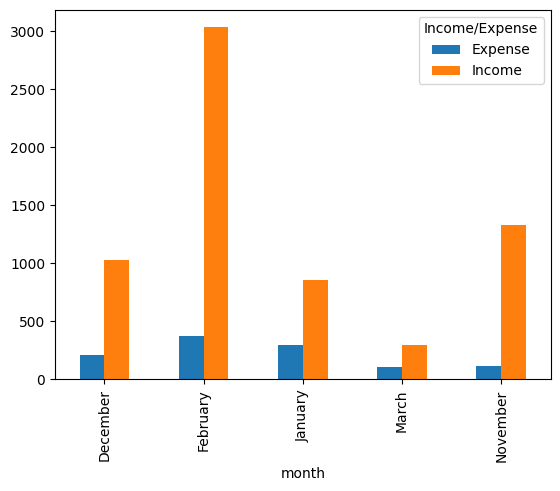

In [281]:
expense.pivot_table(index='month',columns='Income/Expense',values='INR',fill_value=0).plot(kind='bar')